In [1]:
#Import libraries
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import os

In [2]:
#Import df
df = pd.read_csv('~/OneDrive/Desktop/users/helen/school work/Year 3/APS360/Assignment/Airbnb_predictor/dummy_csv/19_07_08_listings.csv')

#Converting all values in price to int
df["price"] = df["price"].apply(lambda x: x.replace('$','').replace(',', '').replace('.00', '')).astype("int")


C:\Users\helen\Anaconda3a\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Function to remove missing data
def missing_data(my_dataframe):
    #computing number of total rows
    total_rows = my_dataframe.shape[0]
    #Dropping rows if empty cells are present in any of the given rows
    my_dataframe = my_dataframe.dropna(subset = ['id','last_scraped', 'host_is_superhost', 
                            'neighbourhood_cleansed', 'property_type',
                           'room_type','accommodates','bathrooms',
                           'bedrooms','beds','amenities', 'price',
                           'minimum_nights','maximum_nights',
                            'instant_bookable','cancellation_policy'])
    #Computing number of rows left after removing rows for error checking
    total_rows_after = my_dataframe.shape[0]
    
    #Printing
    print('total rows before missing data removal:', total_rows)
    print('total rows after missing data removal:', total_rows_after)
    
    return my_dataframe

df = missing_data(df)


total rows before missing data removal: 21312
total rows after missing data removal: 21265


Number of rows before outlier removal 21265


C:\Users\helen\Anaconda3a\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


Number of rows after outlier removal 20800


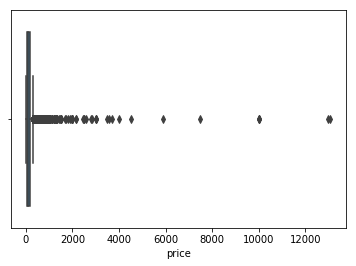

In [4]:
def remove_outlier(my_dataframe):
    
    #Plotting a box and whisker plot for data visualization
    sns.boxplot(x=my_dataframe['price'])
    #Computing the quantiles of the box and whisker plot
    quantiles = my_dataframe['price'].quantile([0.0001, 0.01,0.25,0.5,0.75,0.95,0.99])
    
    #computing number of total rows prior to removing outliers
    total_rows = my_dataframe.shape[0]
    print('Number of rows before outlier removal',total_rows)
    
    #Adjusting data based on quantile information
    #print(quantiles.ix[0.25])
    my_new_dataframe = my_dataframe[(my_dataframe['price'] < quantiles.ix[0.99]) & (my_dataframe['price'] > quantiles.ix[0.01])]
    quantiles = my_new_dataframe['price'].quantile([0.0001, 0.01,0.25,0.5,0.75,0.95,0.99])
    
    #computing new number of total rows
    total_rows = my_new_dataframe.shape[0]
    
    print('Number of rows after outlier removal',total_rows)
    
    #Printing the new quantiles after outlier removal
    #print(quantiles)
    #print(type(quantiles))
    return my_new_dataframe
    
    #print(my_dataframe['price'].mean())
df = remove_outlier(df)
    
    

In [5]:
#Getting all the file_names in a given directory
def get_file_names(folder):
    #Listing entries present in given folder
    entries = os.listdir(folder)
    return entries

#Saving the file
def save_file(name_of_file,my_dataframe):
    #Test if save directory exists
    try:
        my_dataframe.to_csv('../processed_data/'+ name_of_file)
    #Otherwise make the directory and then save
    except:
        os.mkdir('../processed_data')
        my_dataframe.to_csv('../processed_data/'+ name_of_file)
        
    
    
name = get_file_names('../dummy_csv')
save_file(name[1],df)